## 일상대화요약_train.json

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

In [ ]:
def make_dataframe(path: str) -> pd.DataFrame:
    """
    Read a json file and return a pandas DataFrame.

    Parameters:
    path (str): Path to the json file.

    Returns:
    pd.DataFrame: DataFrame of the json file.
    """
    # Read the json file
    with open(path, 'r') as file:
        data = json.load(file)

    # Create a DataFrame
    # columns = ['id', 'conversation', 'subject_keyword', 'output']
    df = pd.DataFrame(data)
    df['conversation'] = df['input'].apply(lambda x: x['conversation'])
    df['subject_keyword'] = df['input'].apply(lambda x: x['subject_keyword'])

    # Drop the 'input' column
    df.drop('input', axis=1, inplace=True)

    # Speakers in the conversation
    df['speakers'] = df['conversation'].apply(lambda turns: list(set(turn['speaker'] for turn in turns)))

    # Reorder the columns
    df = df[['id', 'conversation', 'subject_keyword', 'speakers', 'output']]

    return df

In [ ]:
train_df = make_dataframe('../resource/data/일상대화요약_train.json')
dev_df = make_dataframe('../resource/data/일상대화요약_dev.json')
test_df = make_dataframe('../resource/data/일상대화요약_test.json')

### 샘플 별 화자 수
- 샘플 별 화자 수 : 2명

In [ ]:
# Statistics of the number of speakers in the conversation
print(train_df['speakers'].apply(len).value_counts())
print(dev_df['speakers'].apply(len).value_counts())
print(test_df['speakers'].apply(len).value_counts())

speakers
2    506
Name: count, dtype: int64
speakers
2    102
Name: count, dtype: int64
speakers
2    408
Name: count, dtype: int64


### 샘플 별 키워드 수

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def number_of_keywords(df: pd.DataFrame) -> pd.Series:
    """
    visualization of the number of keywords in the conversation

    Parameters:
    df (pd.DataFrame): DataFrame of the json file.

    """

    subject_keywords = df['subject_keyword'].apply(len).value_counts()

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.barplot(x=subject_keywords.index, y=subject_keywords.values, palette='viridis')

    for i, v in enumerate(subject_keywords.values):
        plt.text(i, v, v, ha='center', va='bottom', fontweight='bold')

    sns.despine()

    plt.title('Number of Keywords in the Conversation', fontdict={'size': 15})
    plt.xlabel('Number of Keywords')
    plt.ylabel('Count')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26840\1086418273.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_keywords.index, y=subject_keywords.values, palette='viridis')


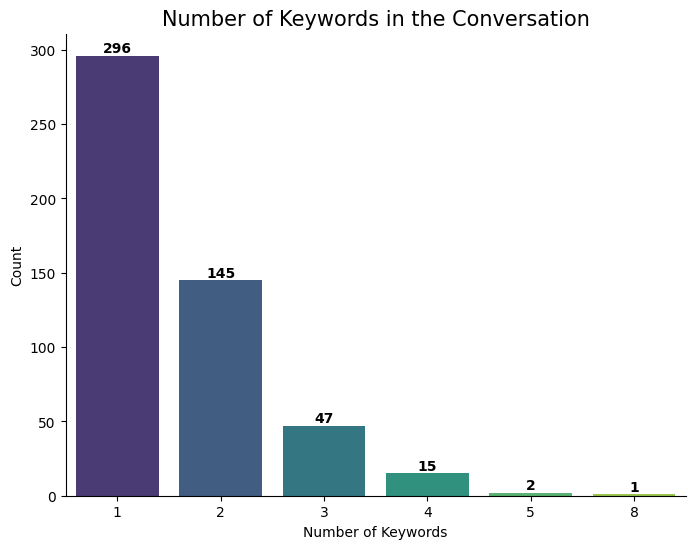

In [ ]:
number_of_keywords(train_df)

C:\Users\user\AppData\Local\Temp\ipykernel_26840\1086418273.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_keywords.index, y=subject_keywords.values, palette='viridis')


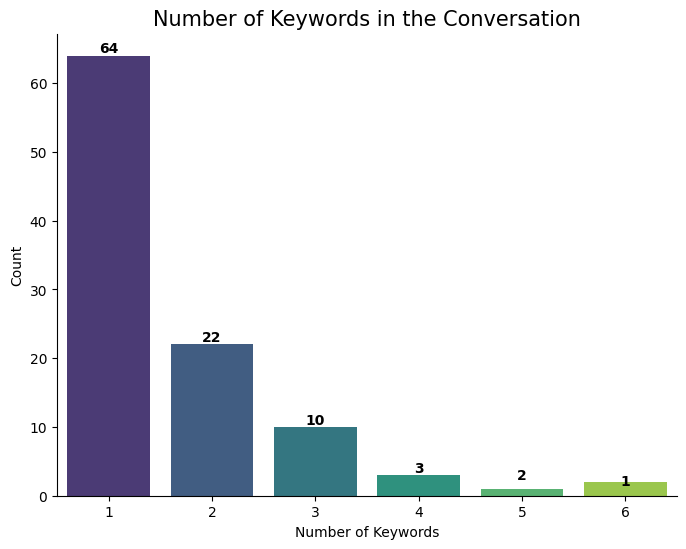

In [ ]:
number_of_keywords(dev_df)

C:\Users\user\AppData\Local\Temp\ipykernel_26840\1086418273.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_keywords.index, y=subject_keywords.values, palette='viridis')


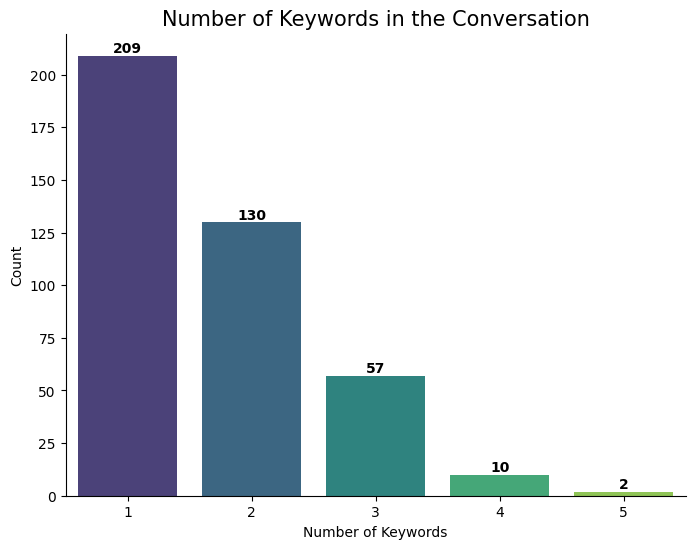

In [ ]:
number_of_keywords(test_df)

### 샘플 별 발화 길이
- 최대 길이 (1024)를 넘어서는 샘플이 많다

In [ ]:
def utterance_length_analysis(df: pd.DataFrame, model_id: str) -> pd.Series:
    """
    visualization of the length of utterances and the number of tokens in the conversation.

    Parameters:
    df (pd.DataFrame): DataFrame of the json file.

    """
    # load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_id)

    # Length of utterances in the conversation
    utterance_length = df['conversation'].apply(lambda turns: [len(turn['utterance']) for turn in turns])
    total_utternce_length = pd.Series([item for list_of_items in utterance_length for item in list_of_items])
    total_utterance_length_per_sample = utterance_length.apply(sum)

    # The number of tokens of each utterance in the dataset
    utternece_tokens = df['conversation'].apply(lambda turns: [len(tokenizer.encode(turn['utterance'], add_special_tokens=False)) for turn in turns])
    total_number_of_utterance_tokens = pd.Series([item for list_of_items in utternece_tokens for item in list_of_items])
    total_number_of_utterance_tokens_per_sample = utternece_tokens.apply(sum)

    length_list = [total_utternce_length, total_utterance_length_per_sample, total_number_of_utterance_tokens, total_number_of_utterance_tokens_per_sample]

    # Visualization
    plt.subplots(2, 2, figsize=(11, 11))
    plt.suptitle('Length of Utterances and the Number of Tokens in the Conversation', fontsize=15)

    for i, length in enumerate(length_list, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(length, color='skyblue', showmeans=True)
        plt.xlabel('Length of Utterances' if i in [1, 2] else 'Number of Tokens')
        plt.ylabel('Count')
        plt.legend(title=f'Mean : {length.mean():.2f}\nMedian : {length.median():.2f}', loc='upper right')
        sns.despine()

    plt.tight_layout()
    plt.show()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


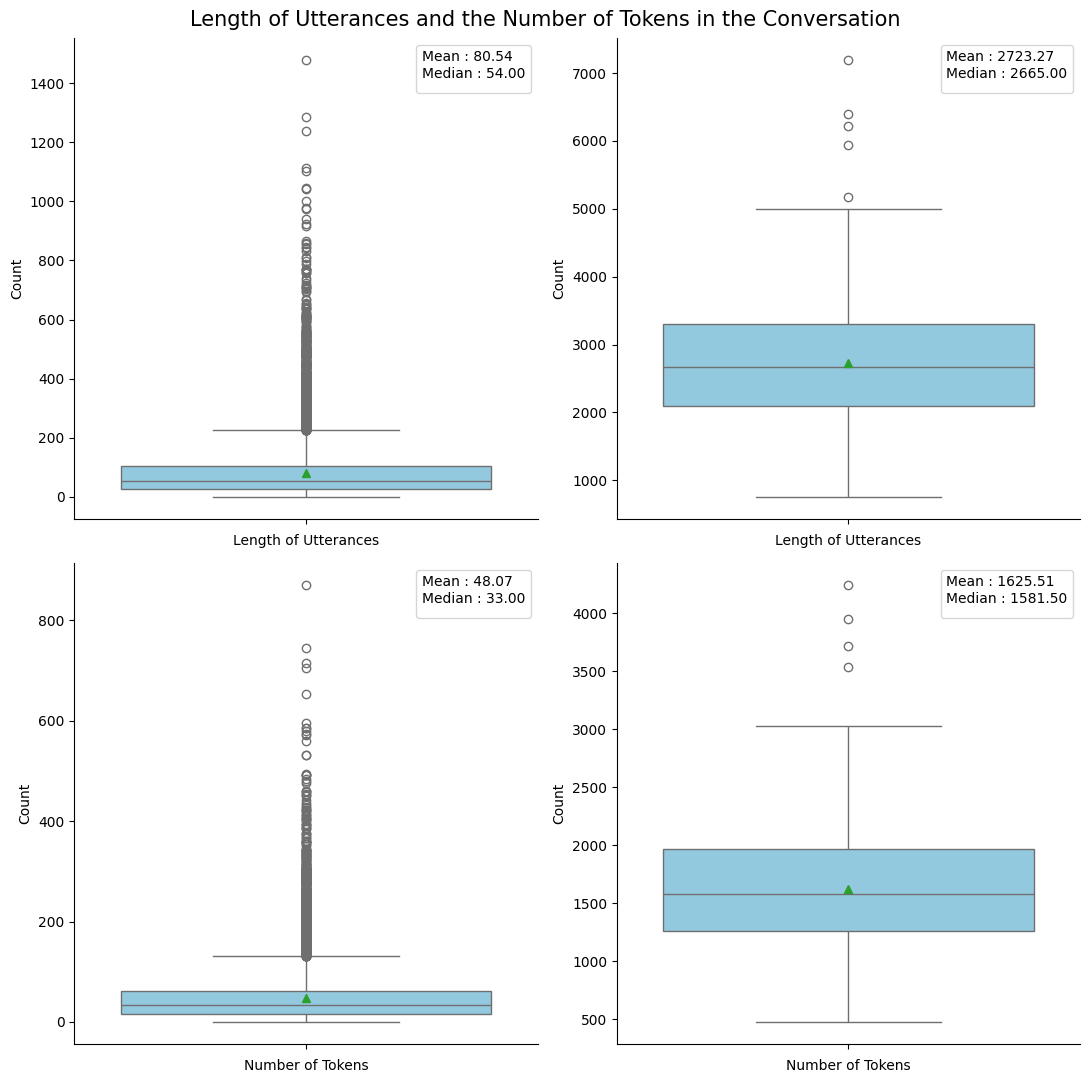

In [ ]:
utterance_length_analysis(train_df, 'MLP-KTLim/llama-3-Korean-Bllossom-8B')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


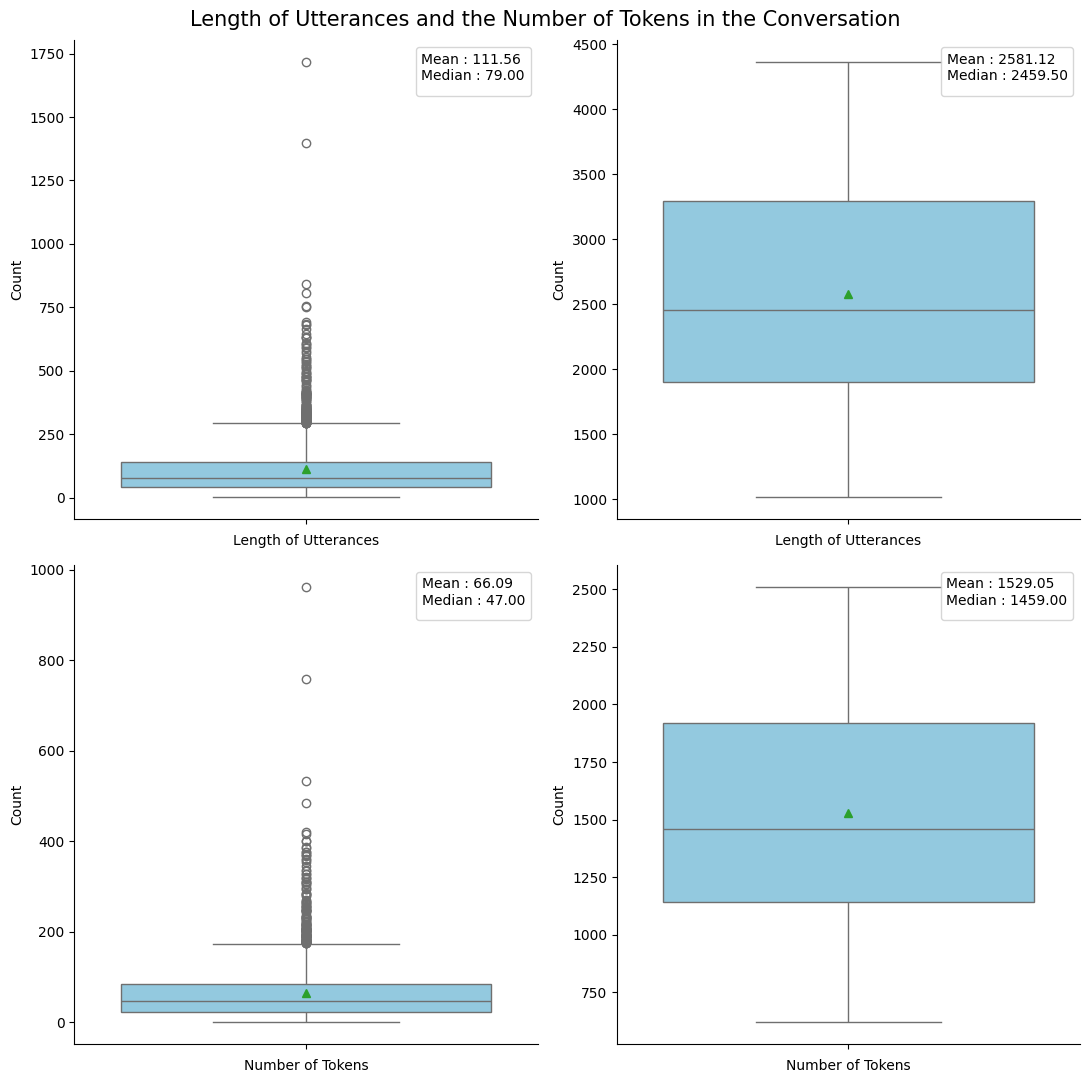

In [ ]:
utterance_length_analysis(dev_df, 'MLP-KTLim/llama-3-Korean-Bllossom-8B')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


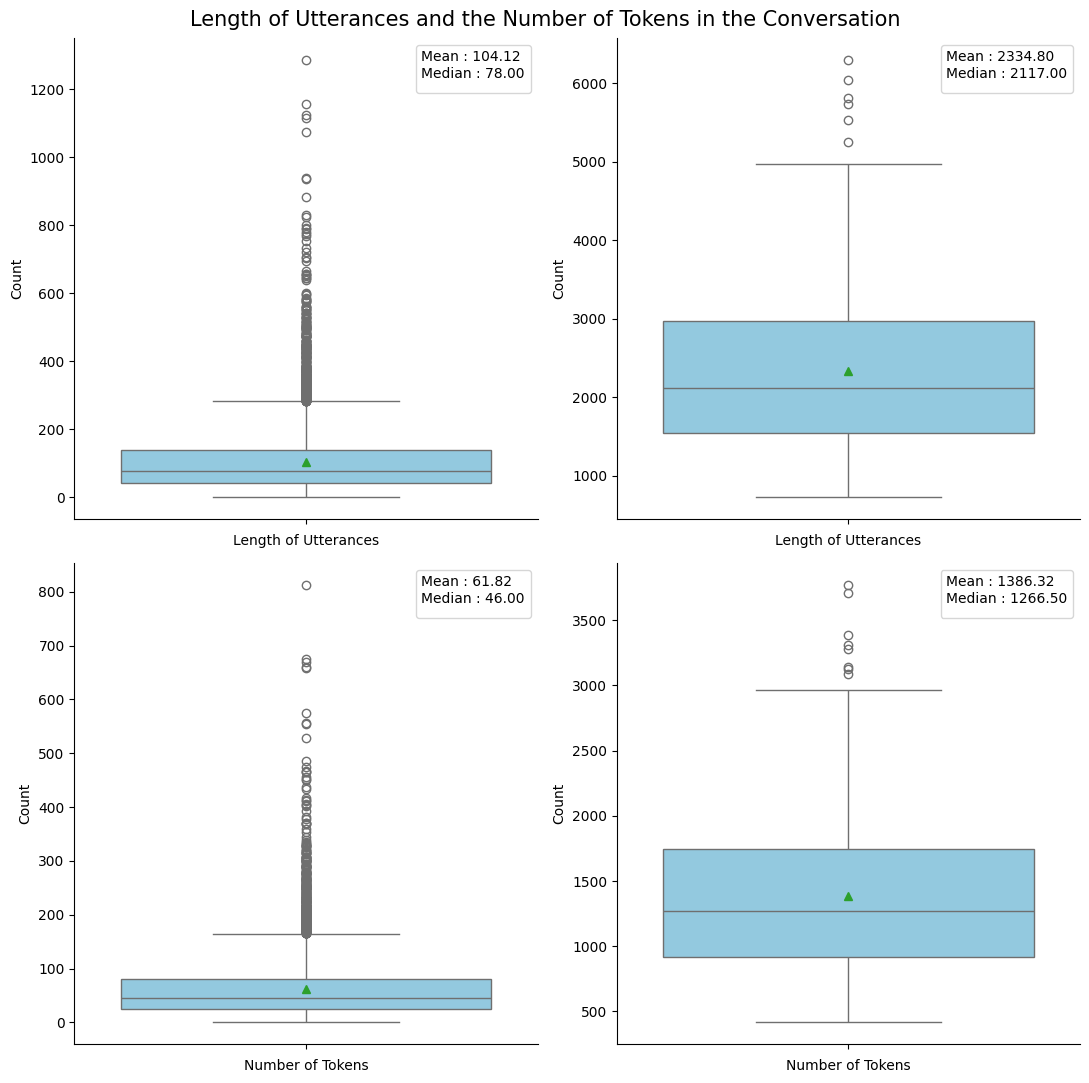

In [ ]:
utterance_length_analysis(test_df, 'MLP-KTLim/llama-3-Korean-Bllossom-8B')

### 샘플 별 전체 입력 길이

In [ ]:
import torch
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, fname, tokenizer):
        IGNORE_INDEX=-100
        self.inp = []
        self.label = []

        PROMPT = '''You are a helpful AI assistant. Please answer the user's questions kindly. 당신은 유능한 AI 어시스턴트 입니다. 사용자의 질문에 대해 친절하게 답변해주세요.'''

        with open(fname, "r") as f:
            data = json.load(f)

        def make_chat(inp):
            chat = ["[Conversation]"]
            for cvt in inp['conversation']:
                speaker = cvt['speaker']
                utterance = cvt['utterance']
                chat.append(f"화자{speaker}: {utterance}")
            chat = "\n".join(chat)

            question = f"[Question]\n위 {', '.join(inp['subject_keyword'])} 주제에 대한 대화를 요약해주세요."
            chat = chat + "\n\n" + question

            return chat
        
        for example in data:
            chat = make_chat(example["input"])
            message = [
                {"role": "system", "content": PROMPT},
                {"role": "user", "content": chat},
            ]
     
            source = tokenizer.apply_chat_template(
                message,
                add_generation_prompt=True,
                return_tensors="pt",
            )

            target = example["output"]
            if target != "":
                target += tokenizer.eos_token
            target = tokenizer(target,
                      return_attention_mask=False,
                      add_special_tokens=False,
                      return_tensors="pt")
            target["input_ids"] = target["input_ids"].type(torch.int64)

            input_ids = torch.concat((source[0], target["input_ids"][0]))
            labels = torch.concat((torch.LongTensor([IGNORE_INDEX] * source[0].shape[0]), target["input_ids"][0]))
            self.inp.append(input_ids)
            self.label.append(labels)

    def __len__(self):
        return len(self.inp)

    def __getitem__(self, idx):
        return self.inp[idx]
    

def number_of_tokens_of_input_data(dataset: Dataset) -> pd.Series:
    """
    visualization of the number of tokens in the input data.

    Parameters:
    dataset (Dataset): CustomDataset

    """
    # The number of tokens of each utterance in the dataset
    number_of_tokens = pd.Series([len(dataset[i]) for i in range(len(dataset))])

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.boxplot(number_of_tokens, color='skyblue')
    plt.title('Number of Tokens in the Input Data', fontdict={'size': 15})
    plt.xlabel('Number of Tokens')
    plt.ylabel('Count')
    sns.despine()
    plt.legend(title=f'Mean : {number_of_tokens.mean():.2f}\nMedian : {number_of_tokens.median():.2f}', loc='upper right')
    plt.show()

    # The number of samples that exceed the maximum token length(1024)
    print(f'The number of samples that exceed the maximum token length(1024) : {sum(number_of_tokens > 1024)}/{len(number_of_tokens)}')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


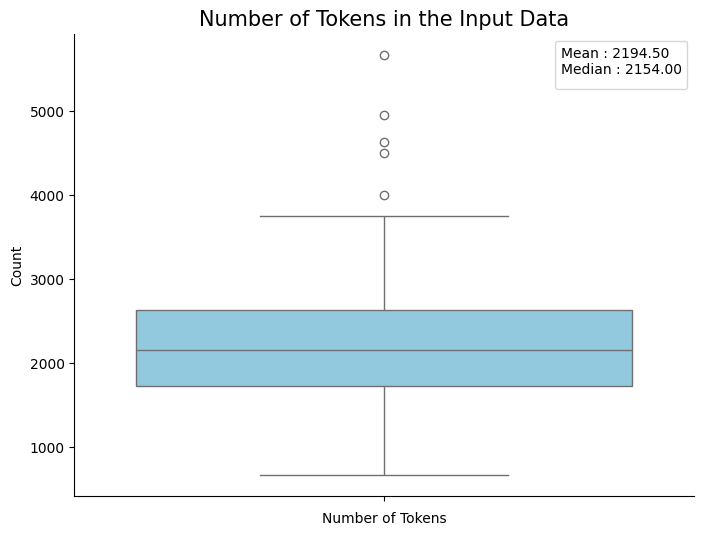

The number of samples that exceed the maximum token length(1024) : 489/506


In [ ]:
number_of_tokens_of_input_data(CustomDataset('../resource/data/일상대화요약_train.json', AutoTokenizer.from_pretrained('MLP-KTLim/llama-3-Korean-Bllossom-8B')))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


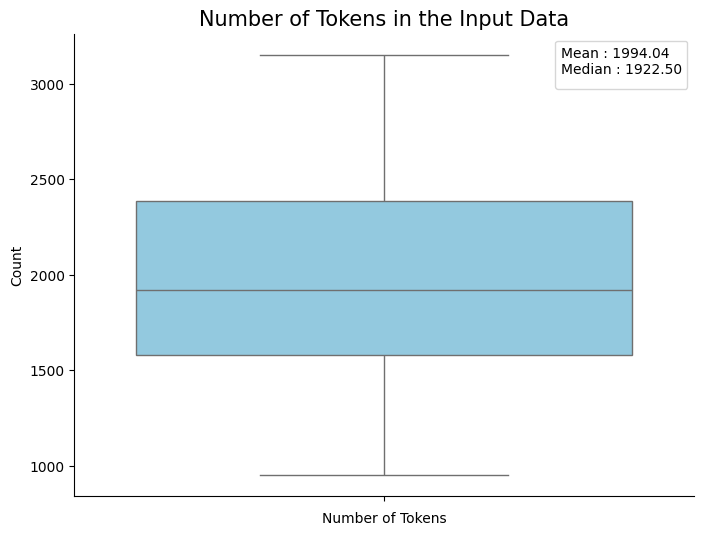

The number of samples that exceed the maximum token length(1024) : 100/102


In [ ]:
number_of_tokens_of_input_data(CustomDataset('../resource/data/일상대화요약_dev.json', AutoTokenizer.from_pretrained('MLP-KTLim/llama-3-Korean-Bllossom-8B')))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


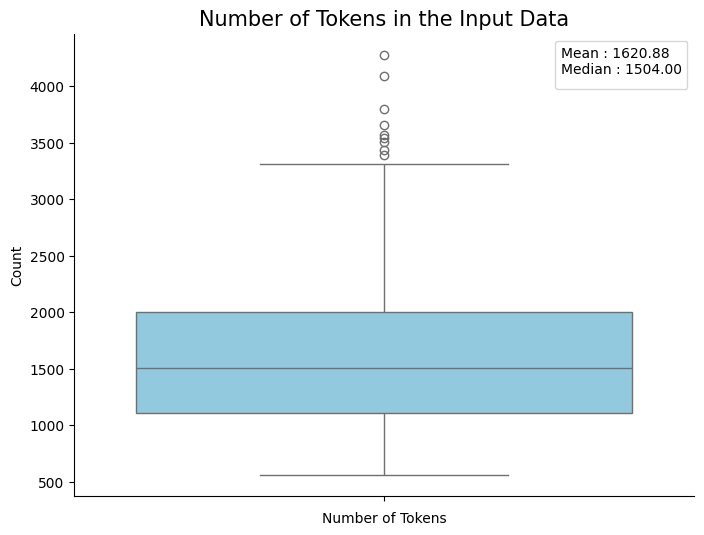

The number of samples that exceed the maximum token length(1024) : 329/408


In [ ]:
number_of_tokens_of_input_data(CustomDataset('../resource/data/일상대화요약_test.json', AutoTokenizer.from_pretrained('MLP-KTLim/llama-3-Korean-Bllossom-8B')))

### Input sample

In [ ]:
PROMPT = '''You are a helpful AI assistant. Please answer the user's questions kindly. 당신은 유능한 AI 어시스턴트 입니다. 사용자의 질문에 대해 친절하게 답변해주세요.'''


with open('../resource/data/일상대화요약_train.json', 'r') as file:
        data = json.load(file)


def make_chat(inp):
            chat = ["[Conversation]"]
            for cvt in inp['conversation']:
                speaker = cvt['speaker']
                utterance = cvt['utterance']
                chat.append(f"화자{speaker}: {utterance}")
            chat = "\n".join(chat)

            question = f"[Question]\n위 {', '.join(inp['subject_keyword'])} 주제에 대한 대화를 요약해주세요."
            chat = chat + "\n\n" + question

            return chat

tokenizer = AutoTokenizer.from_pretrained('MLP-KTLim/llama-3-Korean-Bllossom-8B')
chat = make_chat(data[0]['input'])

message = [
                {"role": "system", "content": PROMPT},
                {"role": "user", "content": chat},
            ]
     
source = tokenizer.apply_chat_template(
                message,
                add_generation_prompt=False,
                return_tensors="pt",
            )

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# add_generation_prompt=True
tokenizer.decode(source[0])

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful AI assistant. Please answer the user's questions kindly. 당신은 유능한 AI 어시스턴트 입니다. 사용자의 질문에 대해 친절하게 답변해주세요.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n[Conversation]\n화자SD2000001: 저는 여행 다니는 것을 굉장히 좋아하는데요. 그래가지고 스페인이나 뭐 영국 유럽 아니면 국내에서도 뭐 강릉이나 전주 같은 데를 많이 다녔는데\n화자SD2000001: 혹시 여행 다니는 거 좋아하시나요?\n화자SD2000002: 저 여행 다니는 거 되게 좋아해서 대학교 내내 여행을 엄청 많이 다녔었는데요.\n화자SD2000002: 제가 고등학교 때는 여행에 대해 흥미가 없었는데 그게 좀 아버지가 짠대로 패키지처럼 여행을 다녀서 그런 것 같아요.\n화자SD2000002: 그래서 대학교 간 이후로는 해외여행을 되게 많이 갔었는데 그중에서 제일 기 좋았던 거는 스페인이랑 포르투갈이었거든요.\n화자SD2000002: 어~ 혹시 포르투갈이나 스페인 유럽 쪽 다녀오신 적 있으신가요?\n화자SD2000001: 어~ 네. 저도 우연히 스페인과 포르투갈을 다녀왔었었습니다.\n화자SD2000001: 어~ 저는 스페인 중에서도 마드리드에 근교에 있었던 톨레도라는 지역이 굉장히 좋았는데요. 그 톨레도에서 특히 기억에 남았던 거는 거기에 대성당이 있는데 그 성당이 엄청 화려하더라고요. 그래서 거기를 꾸며논 거를 보면은 금을 엄청 많이 사용해가지고 되게 빤짝빤짝하고 좀 성당은 보통 좀 소박하다라는 인식이 있었는데 아~ 이렇게 화려한 성당도 있구나라는 거를 새롭게 알게 됐었습니다.\n화자SD2000001: 어~ 또 톨레도에 지역 음식도 같이 먹었었는데 아~ 이름은 지금 잘 생각이 나지는 않지만 굉장히 달달했던 그런 디

In [ ]:
# add_generation_prompt=False
tokenizer.decode(source[0])

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful AI assistant. Please answer the user's questions kindly. 당신은 유능한 AI 어시스턴트 입니다. 사용자의 질문에 대해 친절하게 답변해주세요.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n[Conversation]\n화자SD2000001: 저는 여행 다니는 것을 굉장히 좋아하는데요. 그래가지고 스페인이나 뭐 영국 유럽 아니면 국내에서도 뭐 강릉이나 전주 같은 데를 많이 다녔는데\n화자SD2000001: 혹시 여행 다니는 거 좋아하시나요?\n화자SD2000002: 저 여행 다니는 거 되게 좋아해서 대학교 내내 여행을 엄청 많이 다녔었는데요.\n화자SD2000002: 제가 고등학교 때는 여행에 대해 흥미가 없었는데 그게 좀 아버지가 짠대로 패키지처럼 여행을 다녀서 그런 것 같아요.\n화자SD2000002: 그래서 대학교 간 이후로는 해외여행을 되게 많이 갔었는데 그중에서 제일 기 좋았던 거는 스페인이랑 포르투갈이었거든요.\n화자SD2000002: 어~ 혹시 포르투갈이나 스페인 유럽 쪽 다녀오신 적 있으신가요?\n화자SD2000001: 어~ 네. 저도 우연히 스페인과 포르투갈을 다녀왔었었습니다.\n화자SD2000001: 어~ 저는 스페인 중에서도 마드리드에 근교에 있었던 톨레도라는 지역이 굉장히 좋았는데요. 그 톨레도에서 특히 기억에 남았던 거는 거기에 대성당이 있는데 그 성당이 엄청 화려하더라고요. 그래서 거기를 꾸며논 거를 보면은 금을 엄청 많이 사용해가지고 되게 빤짝빤짝하고 좀 성당은 보통 좀 소박하다라는 인식이 있었는데 아~ 이렇게 화려한 성당도 있구나라는 거를 새롭게 알게 됐었습니다.\n화자SD2000001: 어~ 또 톨레도에 지역 음식도 같이 먹었었는데 아~ 이름은 지금 잘 생각이 나지는 않지만 굉장히 달달했던 그런 디